In [187]:
# Data Manuiplation dependencies
# https://numpy.org/
import numpy as np
# https://pandas.pydata.org/
import pandas as pd 
#----------------------------------
# Visualisations dependencies
# https://matplotlib.org/
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#https://seaborn.pydata.org/
import seaborn as sns
#-------------------------------------
import warnings
import itertools
import os
#--------------------------------
sns.set(style="darkgrid")
# Modelling dependencies
#sklearn Dependencies
# All dependencies can be found here https://scikit-learn.org/stable/
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

# Ignore warnings
warnings.filterwarnings('ignore')

#-----------------------------------------------------------------------

In [188]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)        


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [189]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [190]:
df = pd.read_csv('Covariate_Features.csv')
df.drop(['Coordinates','Transformed_Long','Transformed_Lat','new_long','new_lat','Raster Value'],axis=1,inplace=True)
df.set_index(['long','lat'],inplace=True)
print('there are ', df.shape[0],'values in the original dataframe')
df.head()

there are  47560 values in the original dataframe


Label        Band_1       Band_2       Band_3  \
long         lat                                                           
3.2041666690 6.9116668400  0     31.7800693500 0.7395269300 0.7240887300   
3.2016666690 6.9108335070  0     31.8133735700 0.9948950400 0.9855215000   
3.2025000020 6.9108335070  0     31.7733573900 0.9264146100 0.9177827800   
3.2033333360 6.9108335070  0     31.7356625000 0.8661766050 0.8547444940   
3.2041666690 6.9108335070  0     31.6981773400 0.8114701500 0.7975220700   

                                Band_4       Band_5        Band_6  \
long         lat                                                    
3.2041666690 6.9116668400 2.6885917200 4.2867755900 11.4156141300   
3.2016666690 6.9108335070 2.9507443900 4.4808797800 11.2947263700   
3.2025000020 6.9108335070 2.8844602100 4.4433174100 11.3048772800   
3.2033333360 6.9108335070 2.8196663900 4.4073858300 11.3152218000   
3.2041666690 6.9108335070 2.7564683000 4.3731250800 11.3263654700   

                                Band_7       Band_8       Band_9      Band_10  \
long         lat                                                                
3.2041666690 6.9116668400 1.2052308300 2.3691003300 0.0000000000 0.5830000000   
3.2016666690 6.9108335070 1.4392472500 2.6564304800 0.0000000000 0.8249999900   
3.2025000020 6.9108335070 1.3498789100 2.5759387000 0.0000000000 0.7429999700   
3.2033333360 6.9108335070 1.2609931200 2.4962947400 0.0000000000 0.6510000230   
3.2041666690 6.9108335070 1.1726998100 2.4175825100 0.0000000000 0.5600000000   

                                Band_11       Band_12      Band_13  \
long         lat                                                     
3.2041666690 6.9116668400 18.1289997100 12.0659999800 2.2650713900   
3.2016666690 6.9108335070 18.0569992100 12.3570003500 1.7867676000   
3.2025000020 6.9108335070 18.0499992400 12.2679996500 2.2650713900   
3.2033333360 6.9108335070 18.0429993000 12.1789999000 2.2650713900   
3.2041666690 6.9108335070 18.0359993000 12.0889997500 2.2650713900   

                               Band_14      Band_15        Band_16  \
long         lat                                                     
3.2041666690 6.9116668400 0.0000000000 0.2867200100 103.3705596900   
3.2016666690 6.9108335070 0.0000000000 0.2897384800 103.4428024300   
3.2025000020 6.9108335070 0.0000000000 0.2882597100 103.3705596900   
3.2033333360 6.9108335070 0.0000000000 0.2866577510 103.3705600000   
3.2041666690 6.9108335070 0.0000000000 0.2849056700 103.3705596900   

                                Band_17      Band_18       Band_19  \
long         lat                                                     
3.2041666690 6.9116668400 20.9209995300 0.4639999900 81.1750030500   
3.2016666690 6.9108335070 21.1319999700 0.4140000000 80.9069976800   
3.2025000020 6.9108335070 21.0890007000 0.3820000000 80.9990005500   
3.2033333360 6.9108335070 21.0459995000 0.3709999920 81.0910034000   
3.2041666690 6.9108335070 21.0030002600 0.3709999900 81.1829986600   

                                Band_20       Band_21      Band_22  \
long         lat                                                     
3.2041666690 6.9116668400 -0.3709999900 29.0359993000 0.5860000300   
3.2016666690 6.9108335070 -0.2930000100 29.2579994200 0.4639999900   
3.2025000020 6.9108335070 -0.2780000000 29.1720008900 0.4639999900   
3.2033333360 6.9108335070 -0.2779999970 29.0869999000 0.4729999900   
3.2041666690 6.9108335070 -0.2780000000 29.0009994500 0.4990000100   

                                Band_23      Band_24       Band_25  \
long         lat                                                     
3.2041666690 6.9116668400 56.4990005500 0.6464359800 12.7379999200   
3.2016666690 6.9108335070 56.4109993000 0.6925778400 13.0229997600   
3.2025000020 6.9108335070 56.4090004000 0.6365351700 12.9440002400   
3.2033333360 6.9108335070 56.4080009000 0.5926468970 12.8640003000   
3.2041666690 6.9108335070 56.4070015000 0.5598938500 12.78

In [191]:
#Count_values for sentiment
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total    Percentage
2  32089 67.4700000000
0  15202 31.9600000000
1  269   0.5700000000

<function matplotlib.pyplot.show(close=None, block=None)>

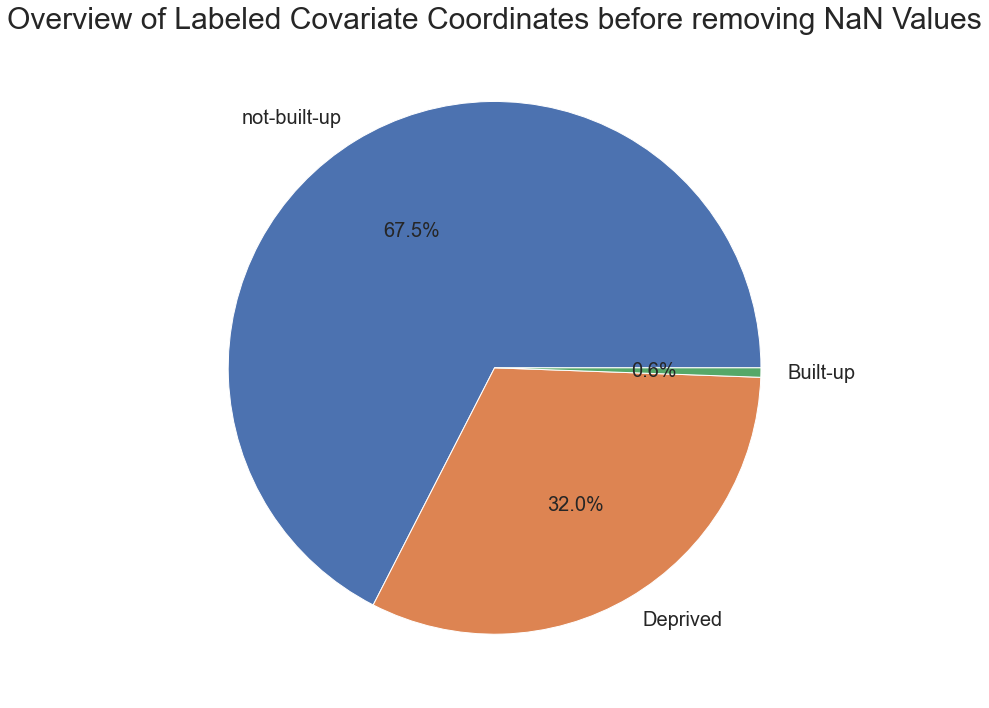

In [192]:
plt.figure(figsize=(10,10))
labels = ['not-built-up','Deprived','Built-up']
plt.title('Overview of Labeled Covariate Coordinates before removing NaN Values', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [193]:
#checking NAN values
null_values = df[df.isnull().any(axis=1)]
print('there are',df[df.isnull().any(axis=1)].shape[0], 'nan values in the dataframe')
print(null_values['Label'].value_counts())
df.dropna(inplace=True)
print('there are ',df.shape[0],'rows of data after removing nan values')

there are 1987 nan values in the dataframe
2    1986
0    1   
Name: Label, dtype: int64
there are  45573 rows of data after removing nan values


In [120]:
#Count_values for sentiment
pie_data= count_values_in_column(df,"Label") # save data aS a dataframe
count_values_in_column(df,"Label")

Total    Percentage
2  30103 66.0500000000
0  15201 33.3600000000
1  269   0.5900000000

<function matplotlib.pyplot.show(close=None, block=None)>

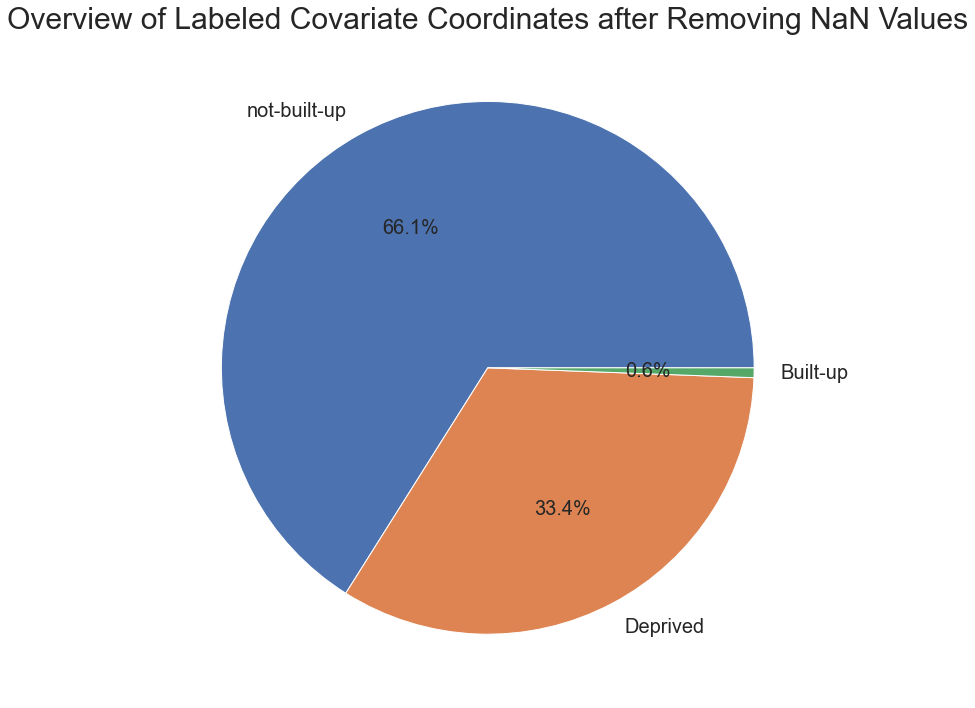

In [121]:
plt.figure(figsize=(10,10))
labels = ['not-built-up','Deprived','Built-up']
plt.title('Overview of Labeled Covariate Coordinates after Removing NaN Values', fontsize=30)
plt.pie(pie_data['Total'], labels=labels, autopct='%1.1f%%', textprops={'fontsize': 20})
plt.rcParams["axes.labelweight"] = "bold"
plt.tight_layout()
plt.show

In [122]:
# Some Useful Functions
def Distribution_plot(dataframe,feature, target, title, xlabel):
    """"
    Plot Distribution of feature for both classes
    
    Parameters
    ------------
    dataframe: Training dataframe
    feature: Variable to find distribution
    target: Dependent variable column containing all classes
    title: Plot title
    """
    
    # set the figure size
    plt.figure(figsize=(10,8))

    ax = plt.subplot()
    #distribution plot for all classes
    sns.distplot(dataframe[feature][dataframe[target] == 0], bins=50, label="Deprived Area")
    sns.distplot(dataframe[feature][dataframe[target] ==1], bins=50, label="Developed Area")
    sns.distplot(dataframe[feature][dataframe[target] ==2], bins=50, label="Water Area")

    plt.title(title, fontsize=14)
    plt.xlabel(xlabel)

    # Add legend and show plot
    ax.legend(title="Area classification")
    plt.show()

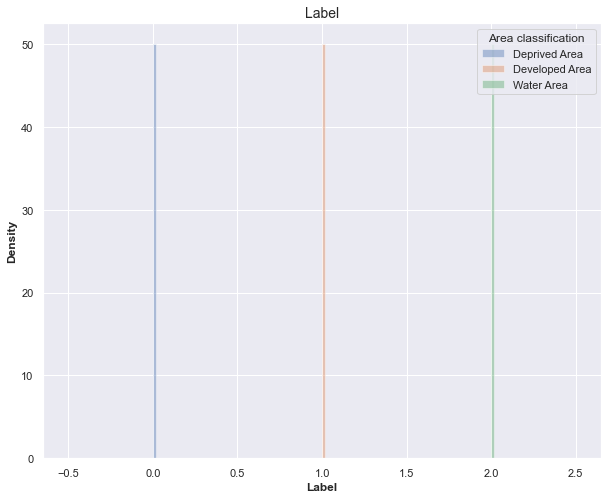

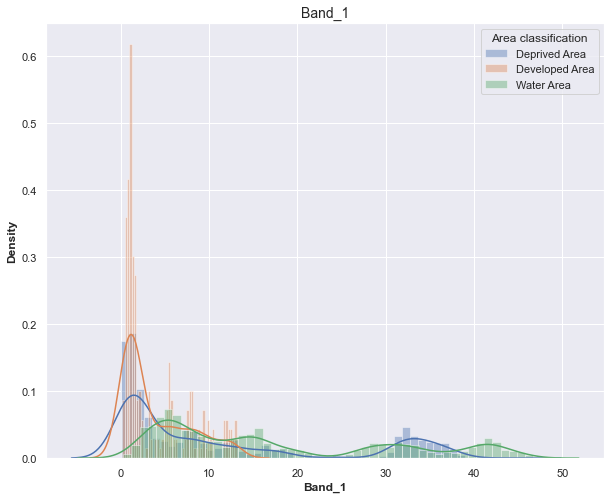

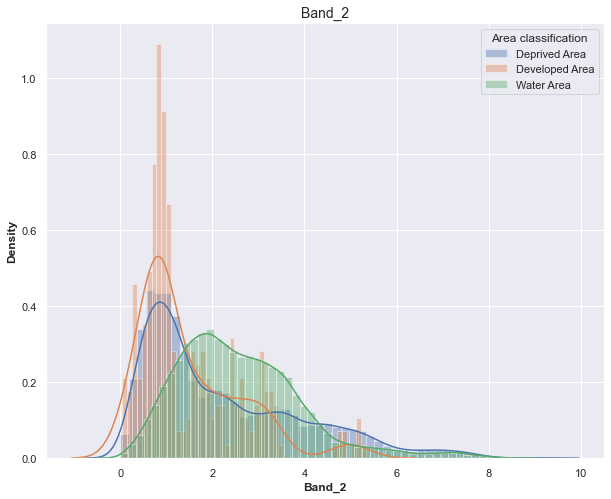

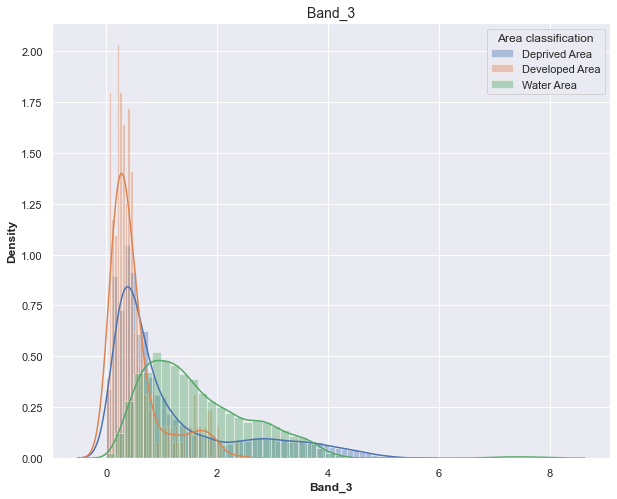

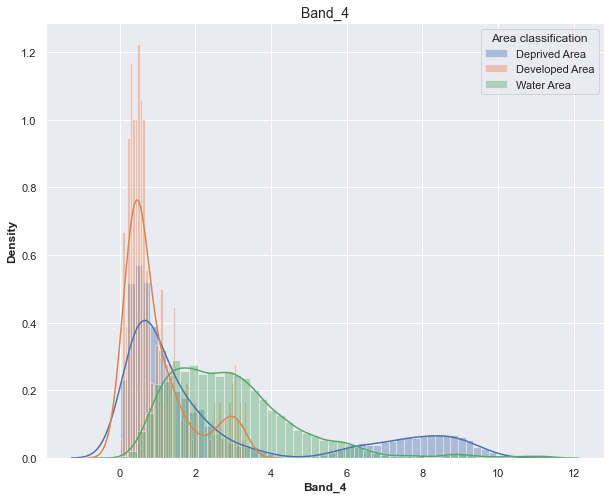

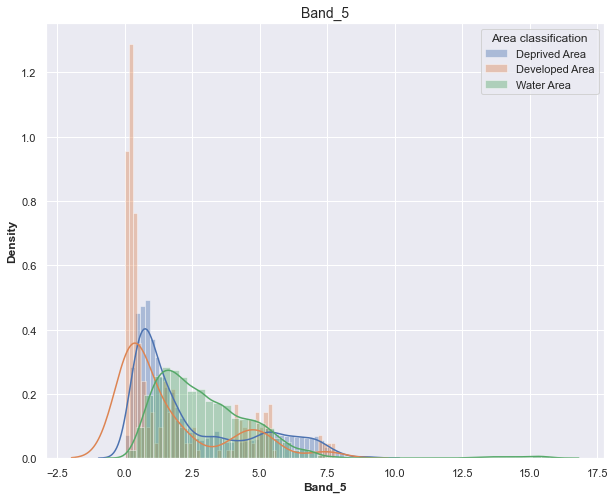

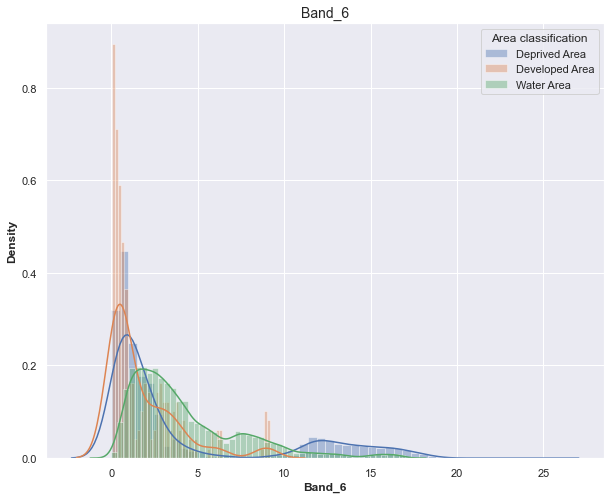

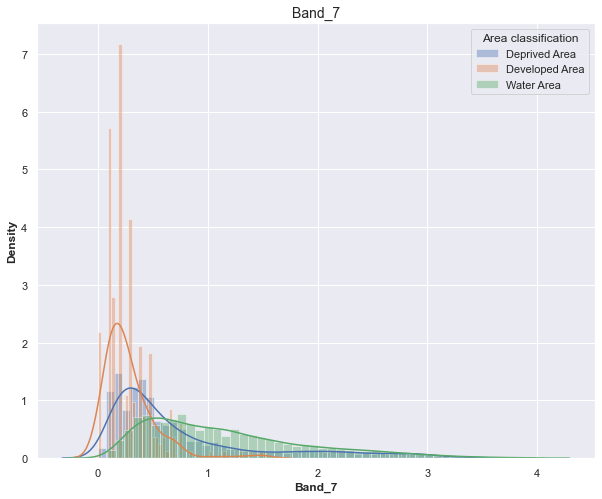

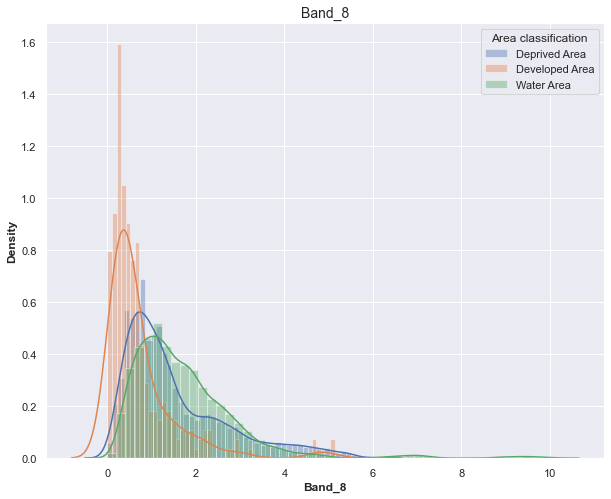

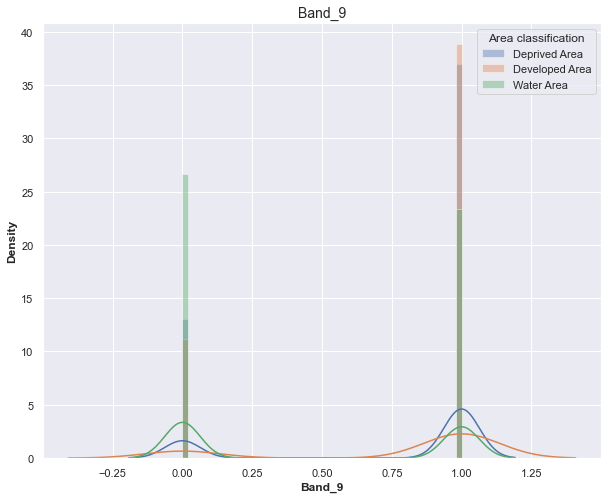

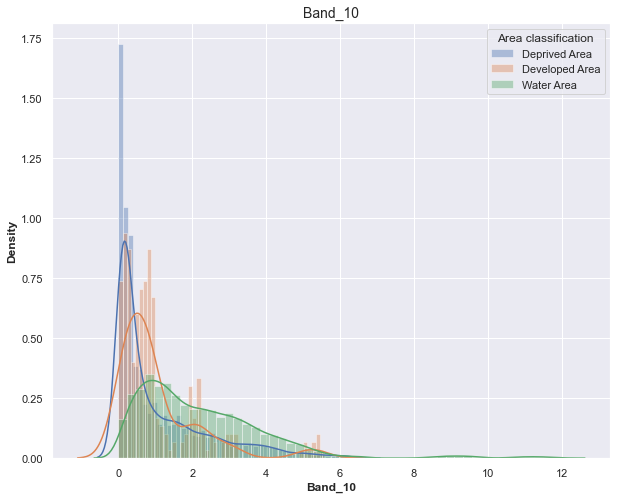

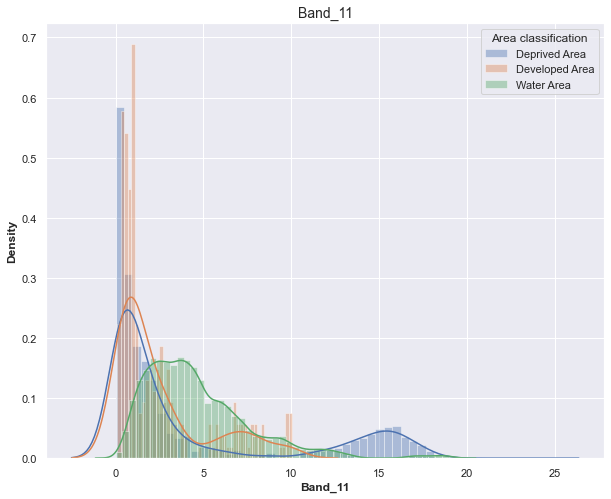

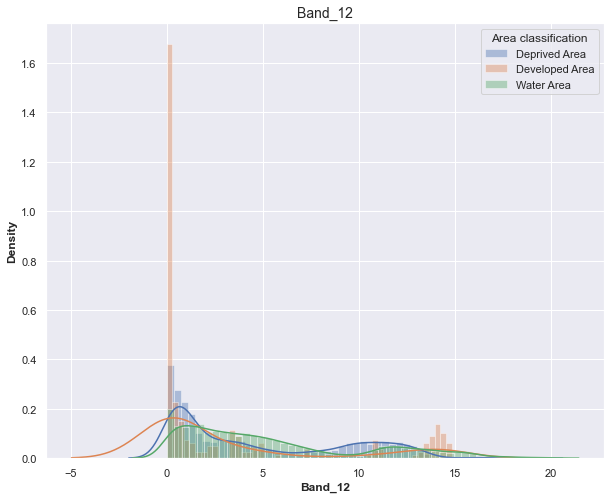

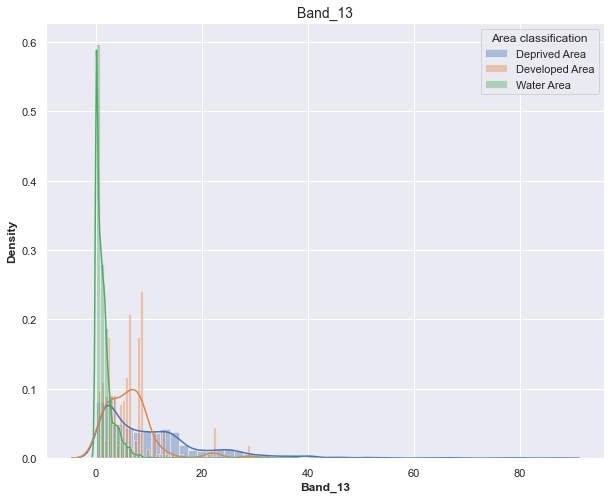

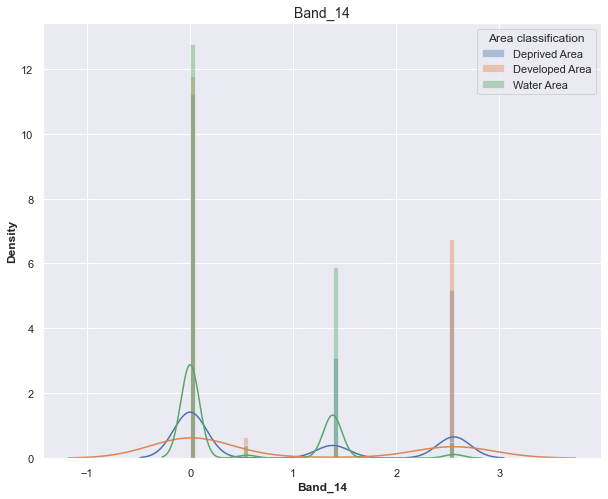

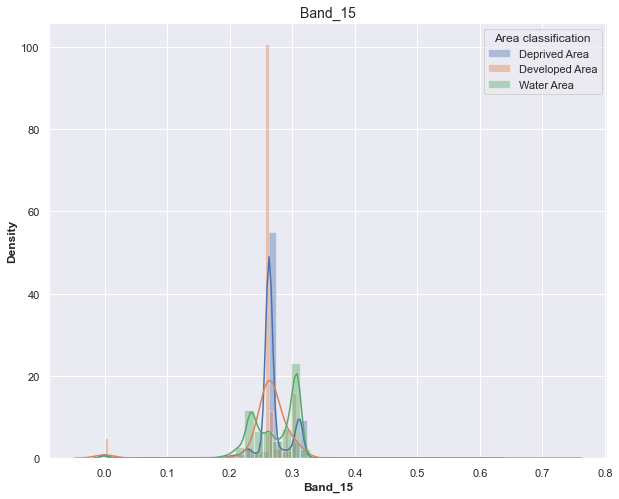

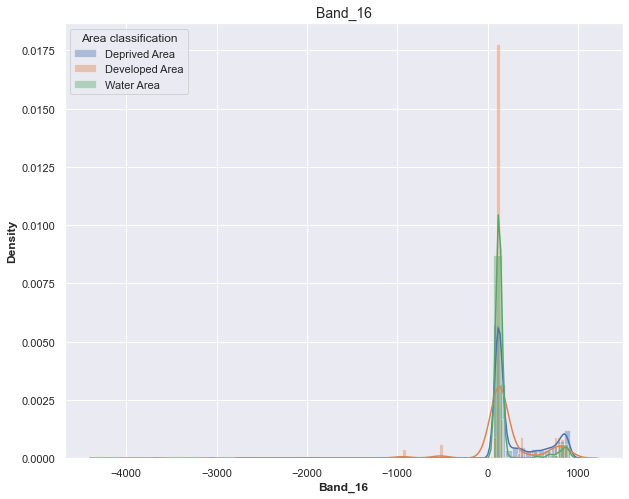

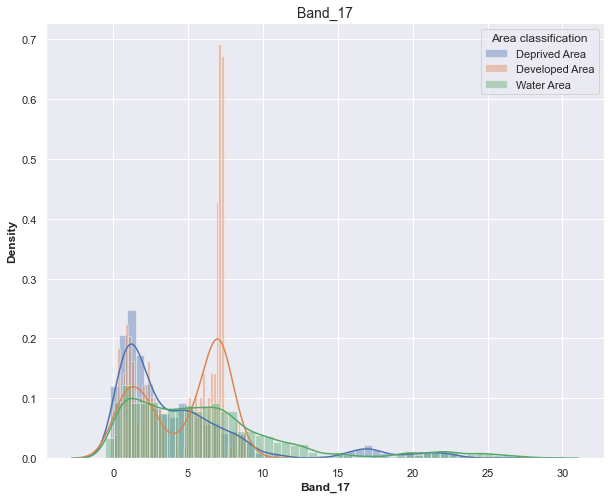

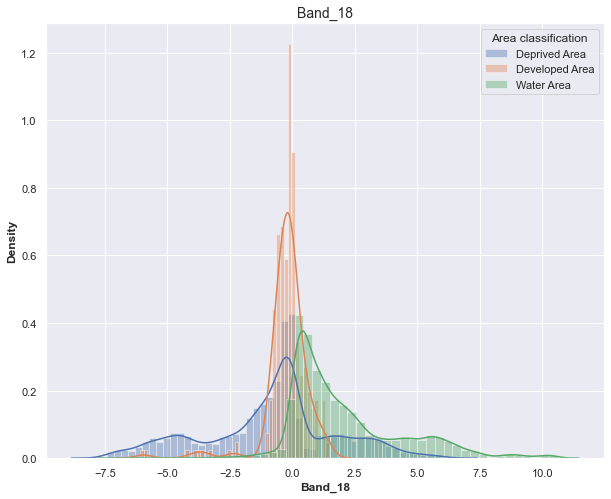

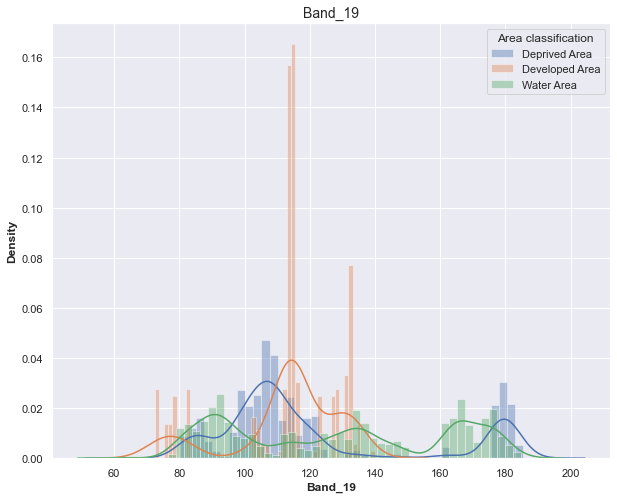

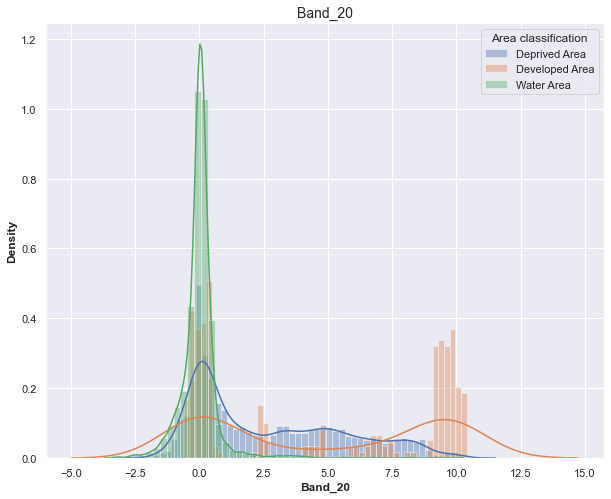

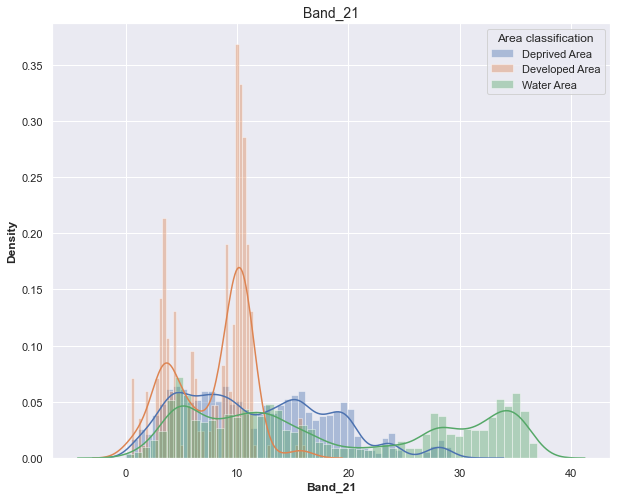

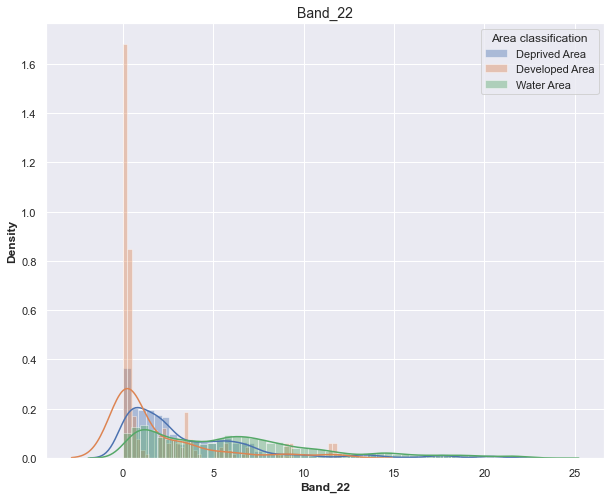

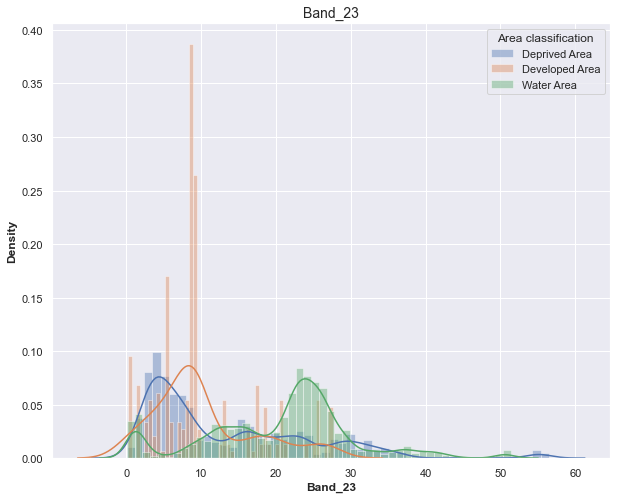

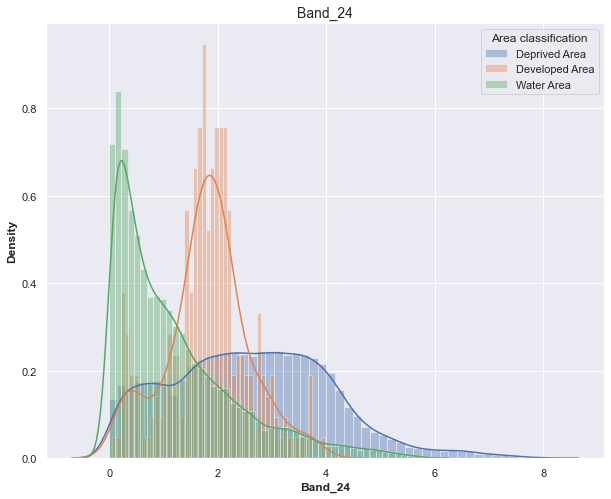

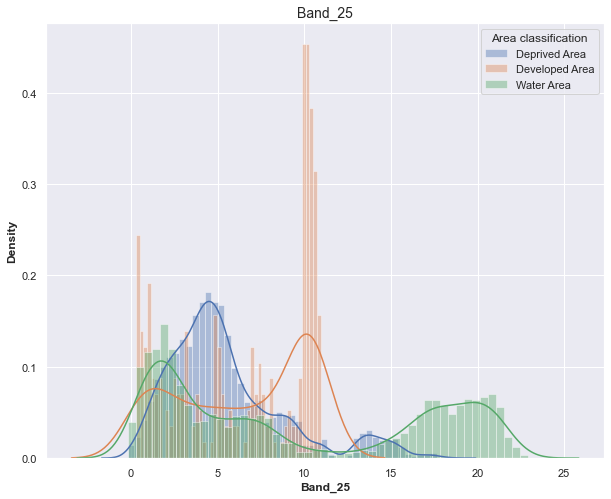

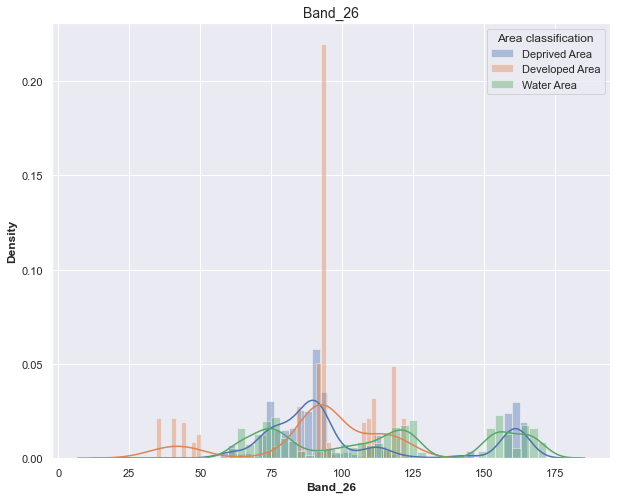

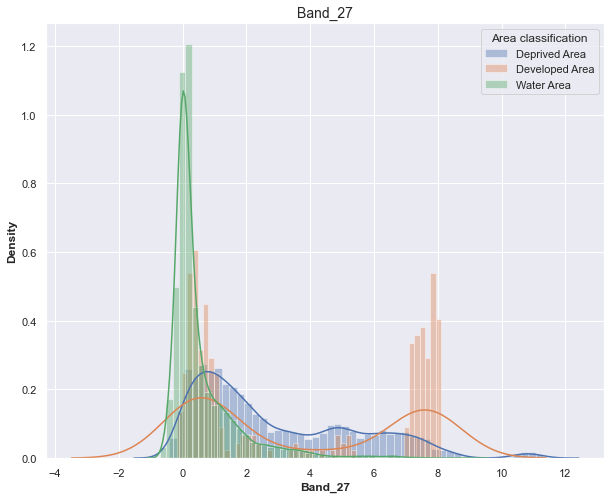

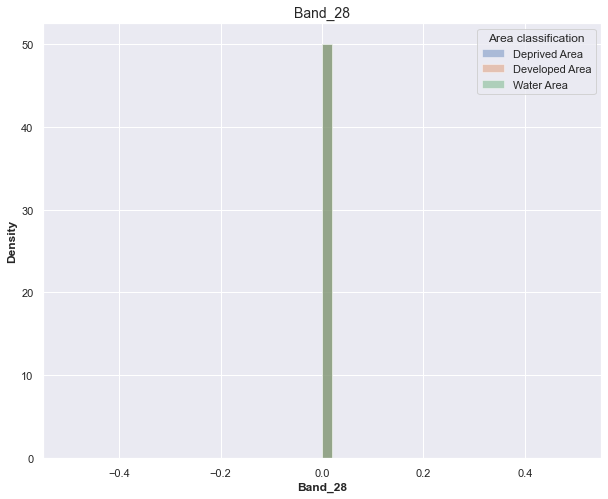

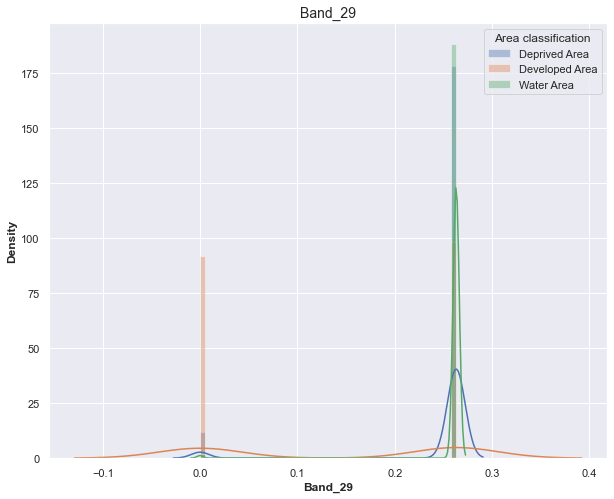

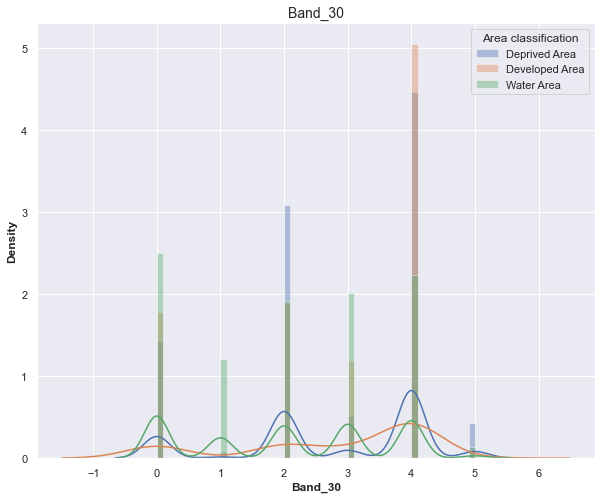

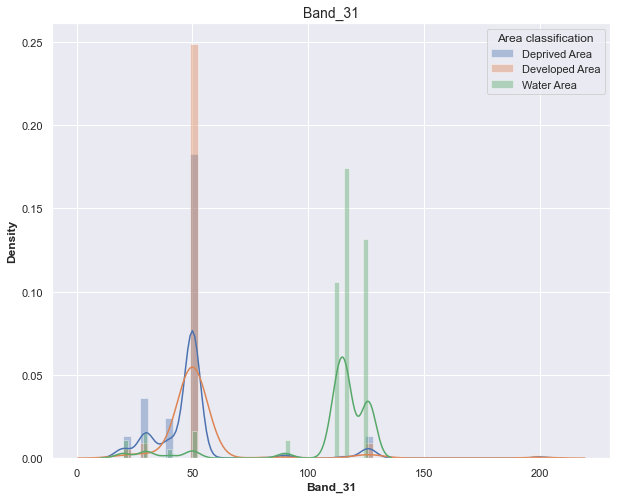

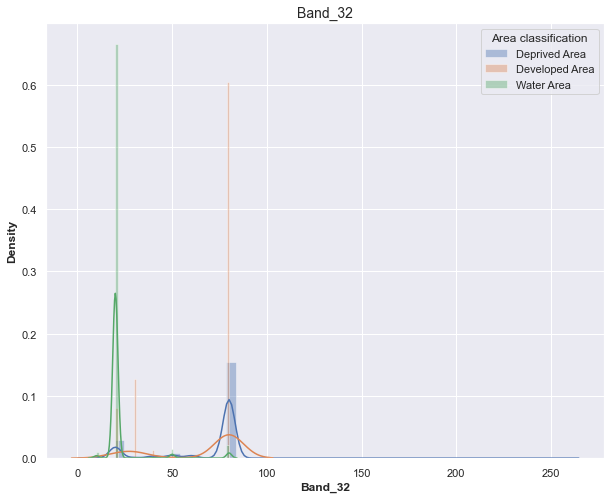

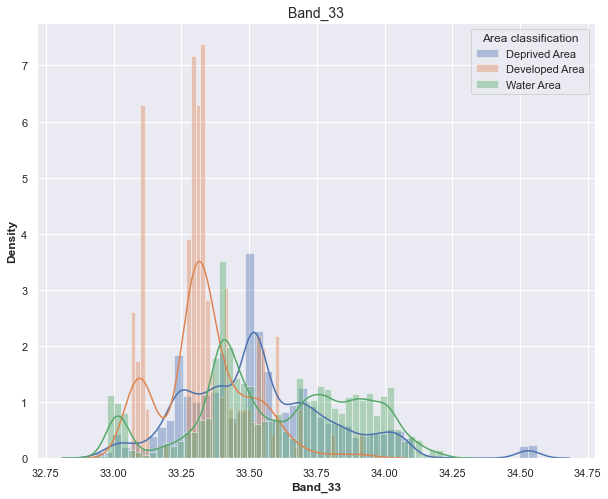

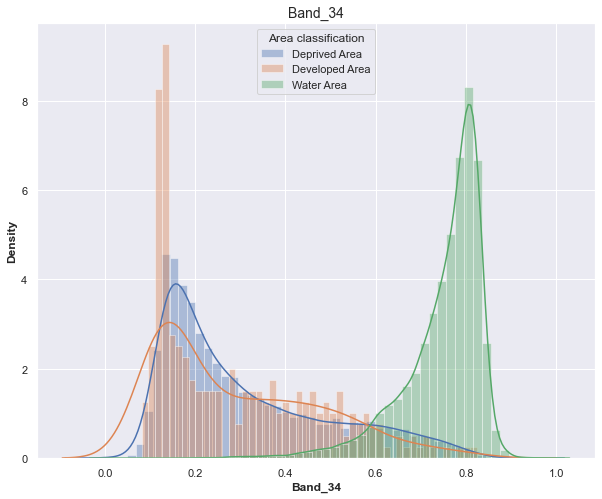

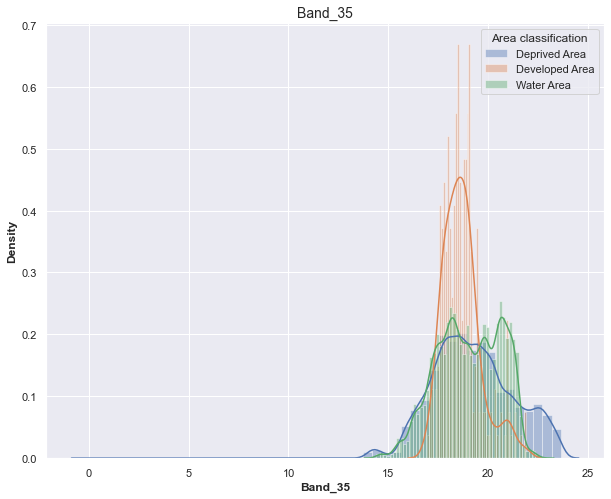

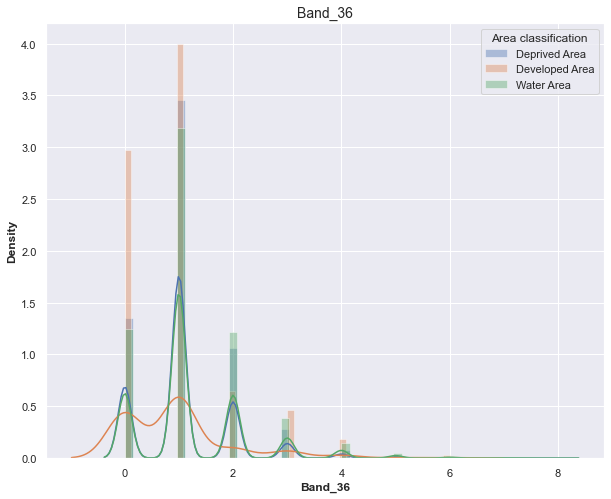

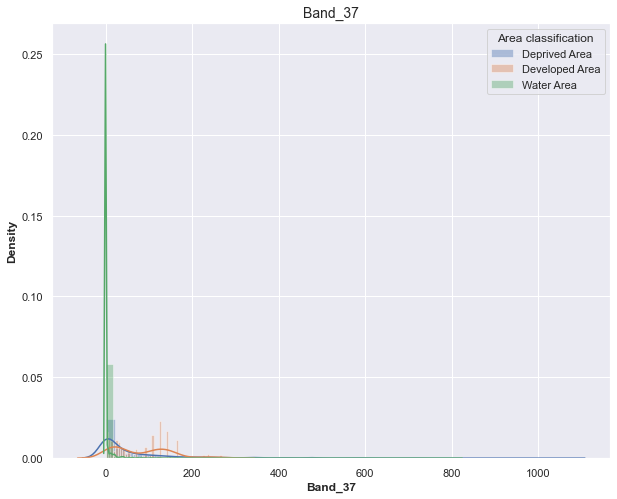

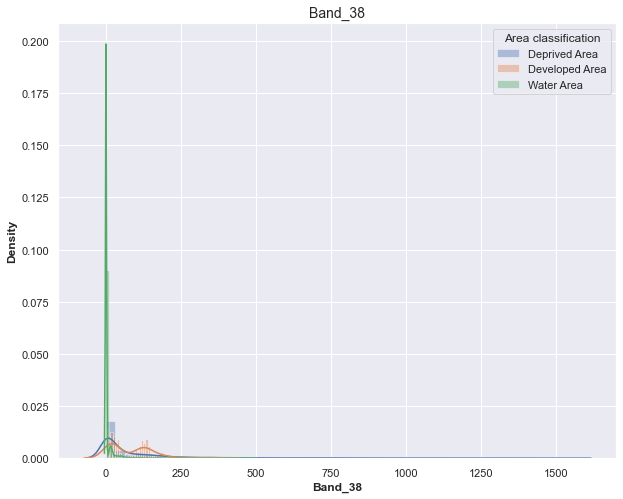

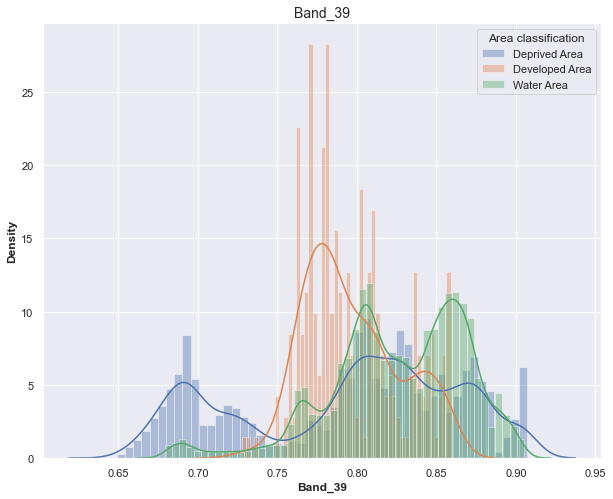

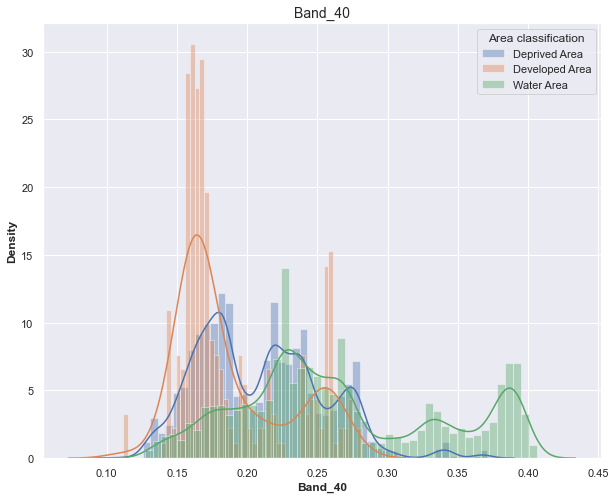

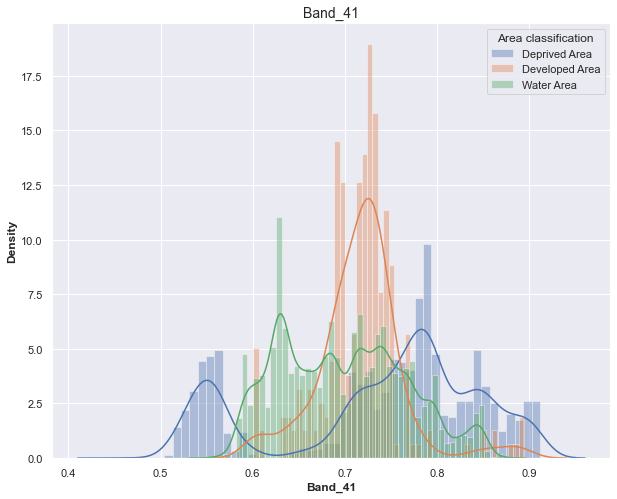

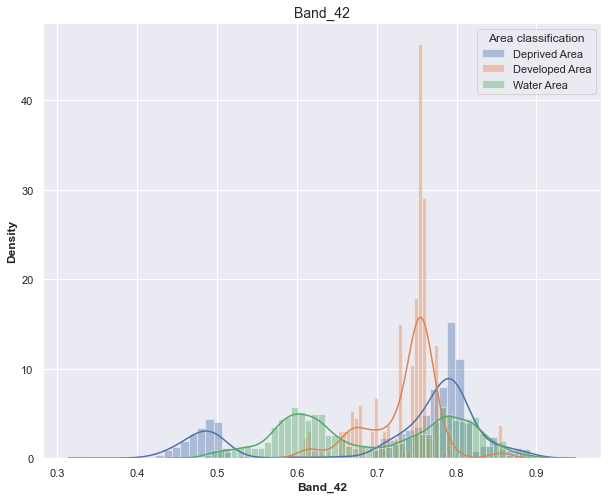

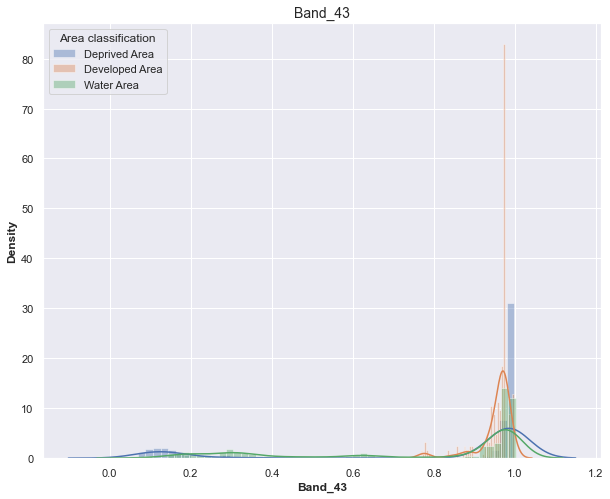

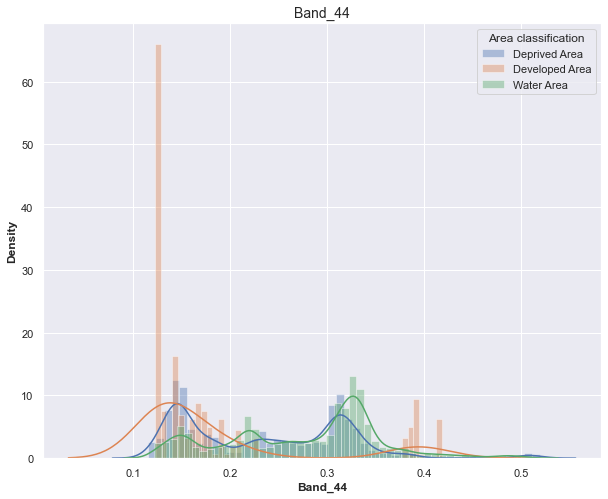

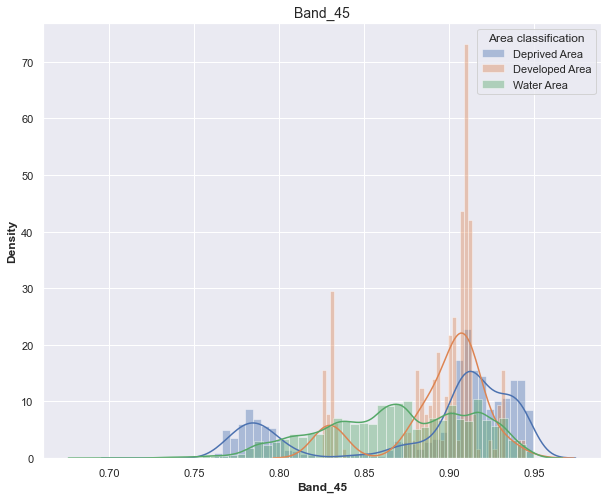

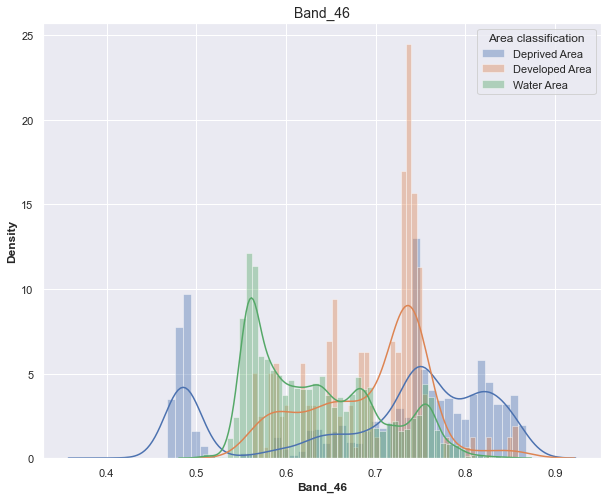

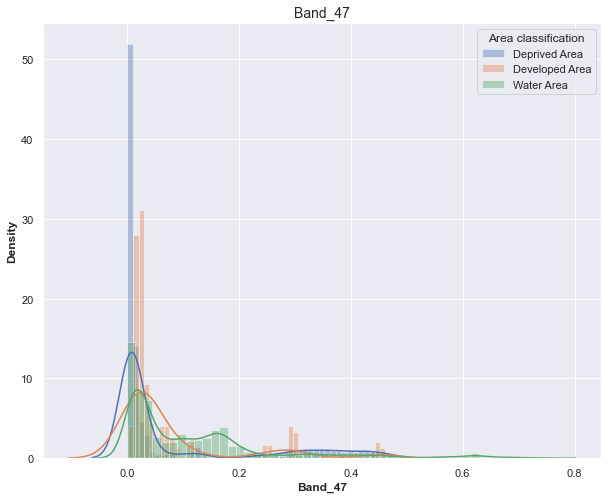

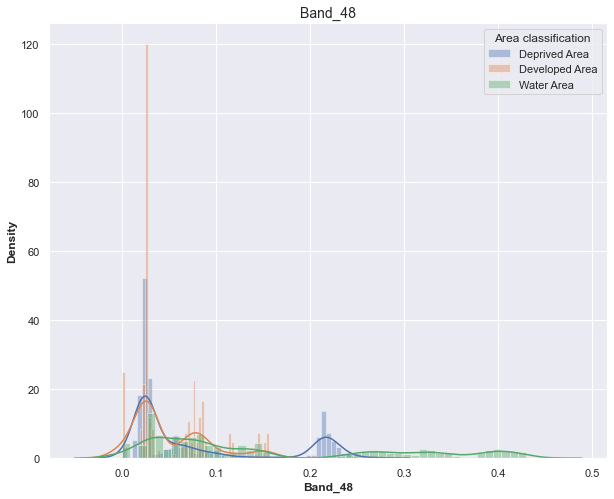

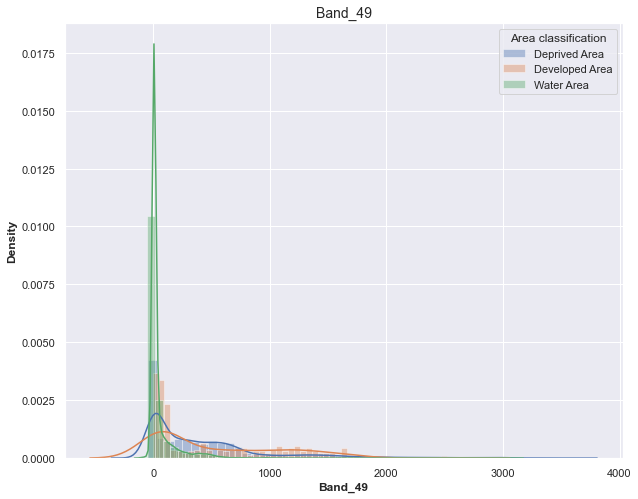

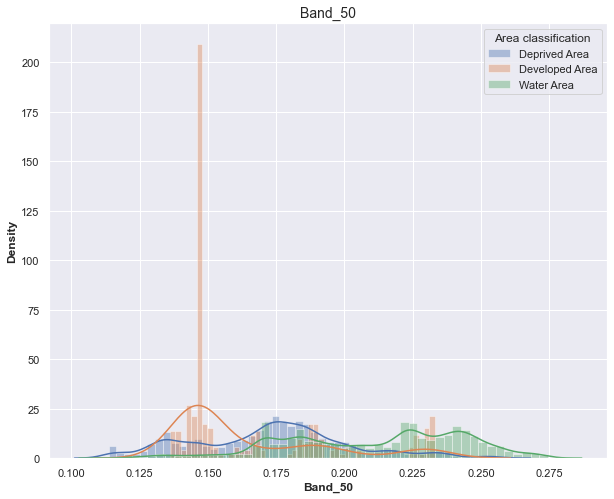

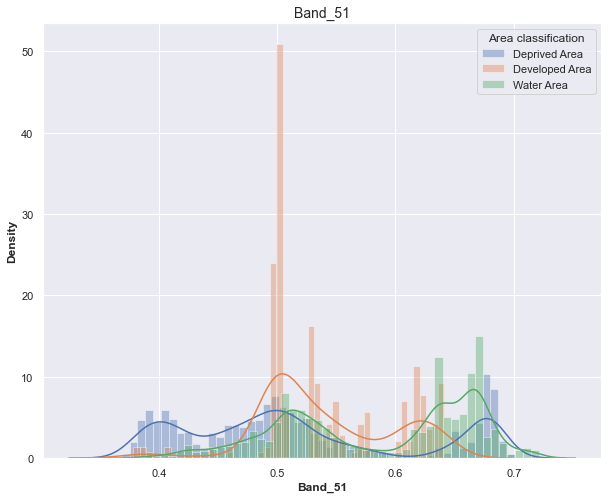

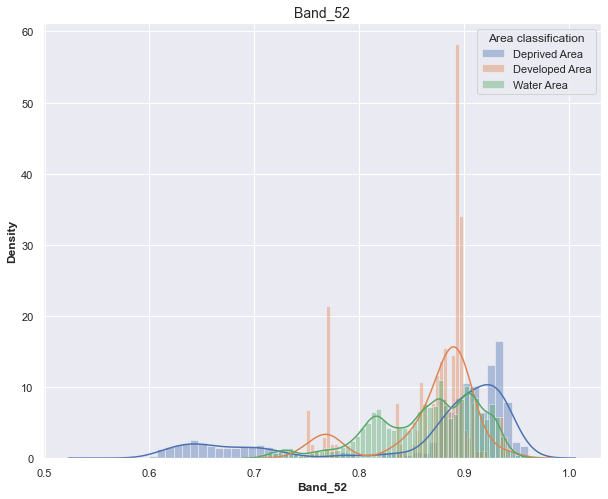

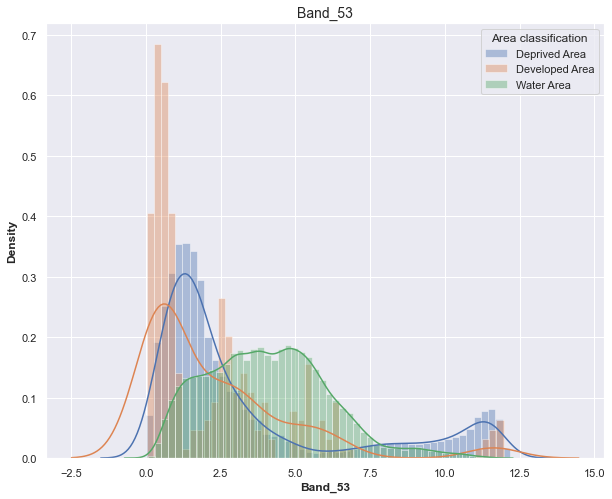

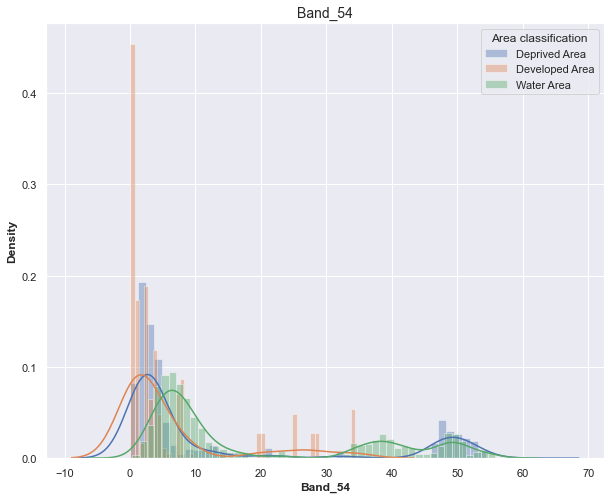

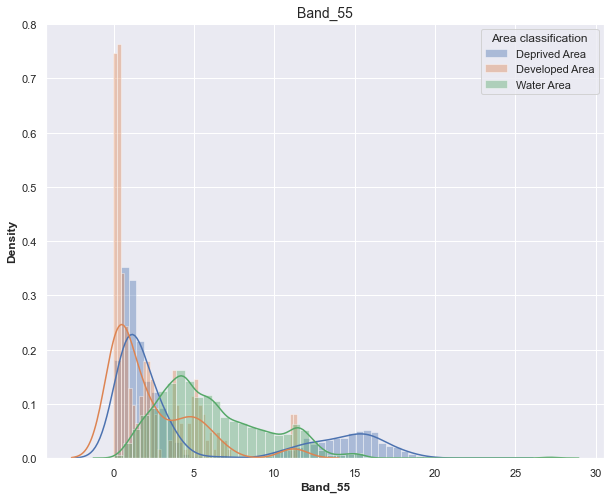

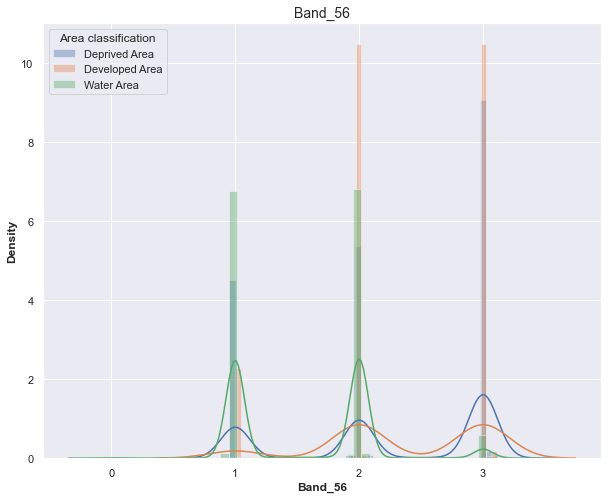

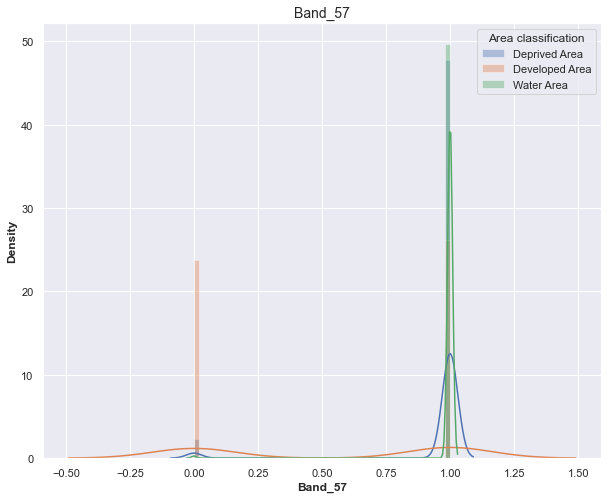

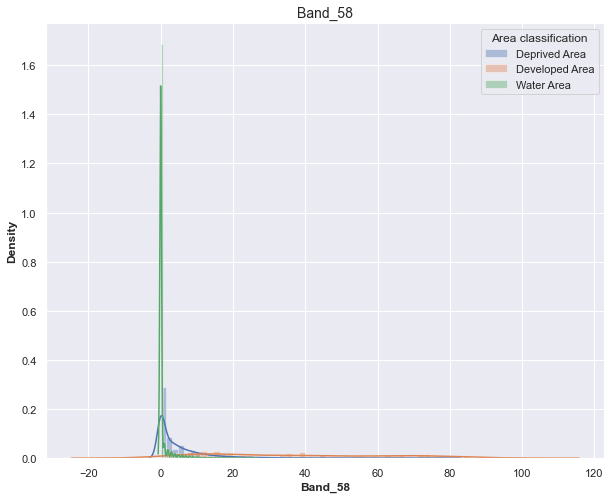

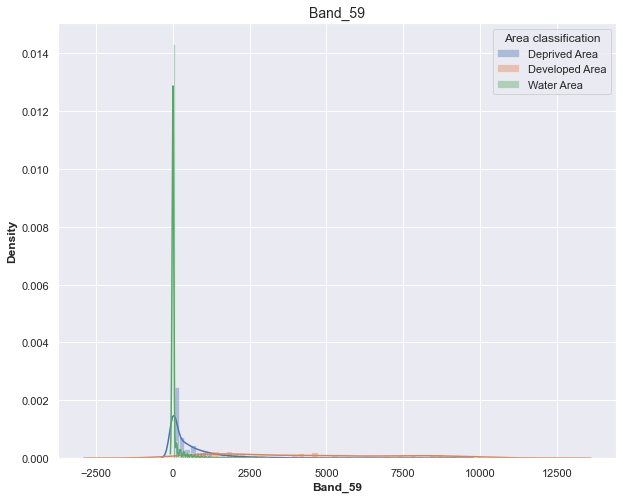

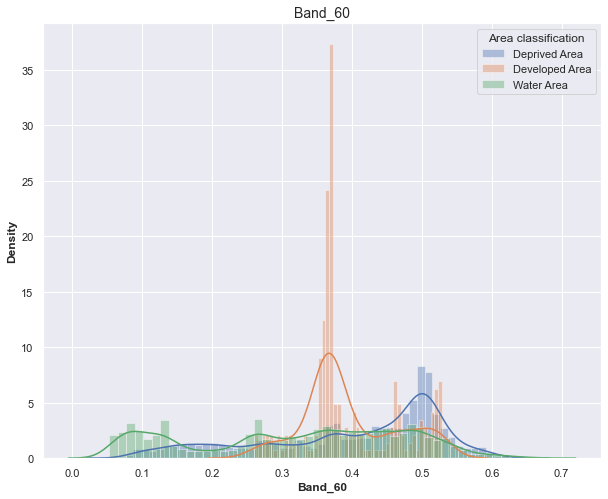

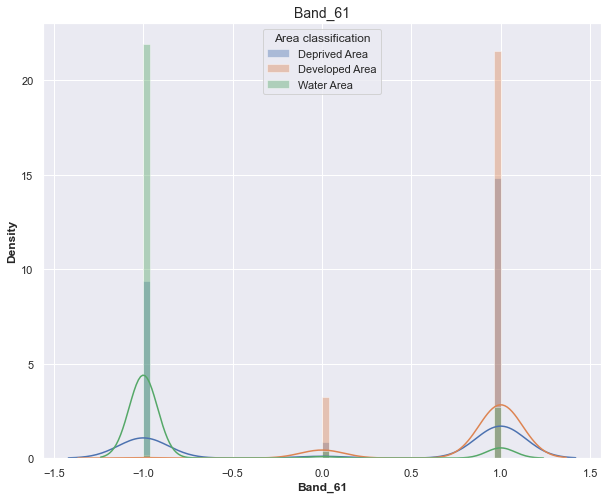

In [123]:
#created distribution plots for the variables
for i in df.columns:
    Distribution_plot(df, "{}".format(i), "Label", "{}".format(i), "{}".format(i))

In [124]:
#heat map on covariates
plt.figure(figsize=(150, 150))
plt.title('Correlation Heat Map of Covariate Data', fontsize= 250)
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='YlOrRd', square=True)
plt.tight_layout()
plt.show()

In [125]:
df.corr()

Label        Band_1        Band_2        Band_3        Band_4  \
Label   1.0000000000  0.2274607323  0.1134304000  0.2114039785  0.0900348098    
Band_1  0.2274607323  1.0000000000  0.3149581672  0.6038570084  0.6645986907    
Band_2  0.1134304000  0.3149581672  1.0000000000  0.5807787119  0.4939624290    
Band_3  0.2114039785  0.6038570084  0.5807787119  1.0000000000  0.7091886341    
Band_4  0.0900348098  0.6645986907  0.4939624290  0.7091886341  1.0000000000    
Band_5  0.1244365405  0.4228325370  0.3593996332  0.3918644049  0.4836364293    
Band_6  0.0210279923  0.7752343349  0.3551798728  0.6226863907  0.7662771627    
Band_7  0.2382733822  0.6112162073  0.3291130918  0.6573454807  0.5760572640    
Band_8  0.0770177326  0.5126064947  0.4271056166  0.6943799010  0.5949987824    
Band_9  -0.2588076906 -0.4806322187 -0.2736141633 -0.4166727180 -0.3912291844   
Band_10 0.3207822126  0.2768593367  0.3831844269  0.5122536655  0.5142105649    
Band_11 0.0435319259  0.4421812878  0.4282229317  0.6116896513  0.6978616325    
Band_12 0.0763006295  0.2206673964  0.3976080337  0.2726138485  0.3257007598    
Band_13 -0.5746960857 -0.4285195571 -0.3168840111 -0.3951030879 -0.3749174057   
Band_14 -0.2150682061 -0.3695097036 -0.0532075052 -0.3623937946 -0.3217682107   
Band_15 0.0642893894  0.1896050954  0.0967953428  0.1076361299  0.1432065979    
Band_16 -0.2150561966 -0.0303679716 0.0176212790  0.1209417445  0.1148575774    
Band_17 0.1680520169  0.2371407793  0.2083102725  -0.0541646002 -0.0375794974   
Band_18 0.5041591060  0.7296631106  0.3890283377  0.6511906338  0.6641371988    
Band_19 0.1072889091  0.7296964963  0.1481866740  0.6020479785  0.5916089972    
Band_20 -0.5605318683 -0.4840075409 -0.4418989910 -0.4395822087 -0.4509409462   
Band_21 0.2954656685  0.7981822468  0.2653529022  0.3429238103  0.3415721687    
Band_22 0.2574488210  0.1450497361  0.3332198814  -0.0237930017 0.0166516150    
Band_23 0.3330945893  0.2398303601  0.0795099433  -0.0328310851 -0.0493014860   
Band_24 -0.4735247765 -0.0581925060 -0.0812830351 -0.0984297325 0.0606796473    
Band_25 0.2785353375  0.6829649612  0.1952896350  0.2472690666  0.2507936522    
Band_26 0.1644070639  0.7700801613  0.1772651098  0.6023620658  0.5905778842    
Band_27 -0.5410613062 -0.3074167543 -0.3057081465 -0.3845729936 -0.3528236829   
Band_28 nan           nan           nan           nan           nan             
Band_29 0.1517657666  0.1628429463  0.1170323288  0.0904744027  0.0887213142    
Band_30 -0.2177051359 -0.3460008332 -0.3467683071 -0.3779259505 -0.3644132470   
Band_31 0.7369688108  0.2375960784  0.1222712854  0.2198232078  0.0955993209    
Band_32 -0.8095585770 -0.2477041914 -0.1394871283 -0.2340847810 -0.1051652969   
Band_33 0.0978083881  0.5238328641  0.0534745457  0.0634205562  0.1413513886    
Band_34 0.8487209180  0.2452638676  0.1516315978  0.1922736323  0.0690439067    
Band_35 -0.0523576464 0.4171516290  0.0838791342  0.4536684653  0.5120944506    
Band_36 0.0694873762  0.1110906825  0.0589963056  0.0796389287  0.0490011061    
Band_37 -0.3974670997 -0.2989201534 -0.2940912550 -0.2917315299 -0.2942248133   
Band_38 -0.3841434581 -0.2948252776 -0.2928765973 -0.2867509130 -0.2905430137   
Band_39 0.2699457867  -0.2503675201 -0.0951508058 -0.4374663112 -0.4460814243   
Band_40 0.3805160302  0.7963494663  0.2210205131  0.4883941210  0.4697496468    
Band_41 -0.2147675577 -0.7867880824 -0.4444739931 -0.7044345241 -0.7267923915   
Band_42 -0.1001138508 -0.6661767541 -0.3161950153 -0.7103116284 -0.6842280270   
Band_43 -0.0673865593 -0.8697538498 -0.2641077807 -0.6459278035 -0.7245542651   
Band_44 0.2406300123  0.6767026946  0.3845494478  0.3581644311  0.4138805584    
Band_45 -0.1624007854 -0.8057005343 -0.4132313064 -0.6374259887 -0.7181967701   
Band_46 -0.3124090235 -0.7885347515 -0.4989753432 -0.7107901591 -0.7159930707   
Band_47 0.1066562169  0.7882262567  0.3183010830  0.7013870493  0.7929390000    
Band_48 0.2893855841  0.9177308643  0.202200782

# Splitting and standardizing data for analysis

In [138]:
# Split data to train and test
X = df.drop('Label', axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20,random_state=42)
df.shape[0]

45573

In [139]:
# Standardize Features for training and test set
# The StandardScaler
ss = StandardScaler()
# Standardize the training data
X_train = ss.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train, columns= X.columns)

In [140]:
# Standardize the test data
X_test = ss.transform(X_test)
X_test_scaled = pd.DataFrame(X_test, columns= X.columns)
#put the standardized values back into dataframe

In [141]:
# Fitting Logistice Regression model
models = {'lr': LogisticRegression(solver= "lbfgs",class_weight = "balanced", random_state=42)}

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

#solver= ["newton-cg", "lbfgs"]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [142]:
# Make directory to save results 
directory = os.path.dirname('result/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [143]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=5,
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    

In [144]:
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                             best_param  \
0 0.8584484655  {'model__C': 10, 'model__tol': 1e-05}   

                                                                    best_estimator  
0  (LogisticRegression(C=10, class_weight='balanced', random_state=42, tol=1e-05))

In [145]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [146]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9669718770438195, 0.4326923076923077, 0.9885771879724509]   

                                                         Recall  \
0  [0.9628785411917942, 0.9574468085106383, 0.9813239953309988]   

                                                       F1-score  
0  [0.9649208680045684, 0.5960264900662252, 0.9849372384937238]

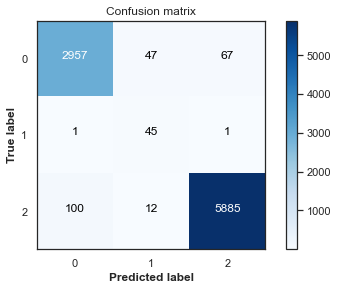

In [147]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [148]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3071
           1       0.43      0.96      0.60        47
           2       0.99      0.98      0.98      5997

    accuracy                           0.97      9115
   macro avg       0.80      0.97      0.85      9115
weighted avg       0.98      0.97      0.98      9115



# logistic model building

In [131]:
# manually set weights
models = {'lr': LogisticRegression(solver= "lbfgs", random_state=42)}


pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}

# Logistic Regression hyperparamters

# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3, 10 ** -2, 10 ** -1]

# The parameter grid of C
C_grid = [0.001, 0.0001, 0.1, 1, 10]

param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]



In [132]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=-1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym +  'stratifiedCV.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                            best_param  \
0 0.9179991552  {'model__C': 1, 'model__tol': 1e-05}   

                                          best_estimator  
0  (LogisticRegression(C=1, random_state=42, tol=1e-05))

In [133]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9795514511873351, 0.851063829787234, 0.9839297548045063]   

                                                        Recall  \
0  [0.9671116900032563, 0.851063829787234, 0.9903284975821244]   

                                                       F1-score  
0  [0.9732918236932657, 0.8510638297872339, 0.9871187567522647]

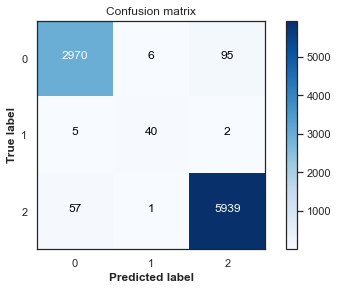

In [134]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [135]:
 print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3071
           1       0.85      0.85      0.85        47
           2       0.98      0.99      0.99      5997

    accuracy                           0.98      9115
   macro avg       0.94      0.94      0.94      9115
weighted avg       0.98      0.98      0.98      9115



# L1 Regularization

In [194]:
lm = LogisticRegression(penalty='l1',random_state=123, solver='liblinear')
# fit the model
lm.fit(X_train_scaled, y_train)
y_pred_lm= lm.predict(X_test_scaled)

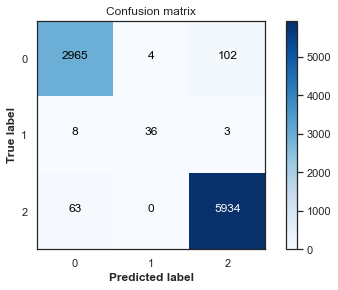

In [195]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_pred_lm)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [196]:
 print(classification_report(y_test,y_pred_lm))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3071
           1       0.90      0.77      0.83        47
           2       0.98      0.99      0.99      5997

    accuracy                           0.98      9115
   macro avg       0.95      0.91      0.93      9115
weighted avg       0.98      0.98      0.98      9115



In [197]:
#organize importance by coefficients
importance = lm.coef_[0]
Feat_num = []
Score = []
for i,v in enumerate(importance):
    Feat_num.append(i)
    Score.append(v)
feat_num = pd.DataFrame (Feat_num, columns = ['feature_number'])
score = pd.DataFrame (Score, columns = ['score'])


In [198]:
#get names of 
Names = []
for i in X:
    Names.append(i)
names = pd.DataFrame (Names, columns = ['Contextual_features'])
names.head()

Contextual_features
0  Band_1            
1  Band_2            
2  Band_3            
3  Band_4            
4  Band_5

In [203]:
metrics_1 = names.merge(feat_num, left_index=True, right_index=True)
metrics = metrics_1.merge(score, left_index=True, right_index=True)
metrics['values'] = metrics['score'].abs()
best_logistic= metrics.sort_values('values', ascending=False).reset_index(drop=True)
best_logistic.to_csv('Covariate_logistic_feature_importance.csv',index=False)
best_logistic.head()

Contextual_features  feature_number         score       values
0  Band_43             42             -3.5640559436 3.5640559436
1  Band_44             43             3.4055598495  3.4055598495
2  Band_51             50             -3.1147083199 3.1147083199
3  Band_18             17             -3.1032489068 3.1032489068
4  Band_33             32             -2.8294384552 2.8294384552

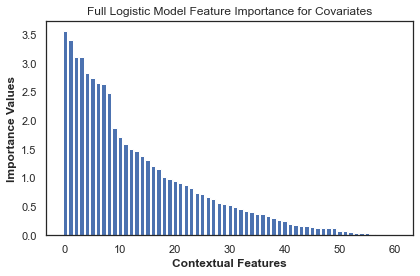

In [200]:
# plot feature importance
plt.figure()
plt.title('Full Logistic Model Feature Importance for Covariates')
plt.bar([x for x in range(len(importance))], best_logistic['values'])
plt.xlabel('Contextual Features')
plt.ylabel('Importance Values')
plt.tight_layout()
plt.show()

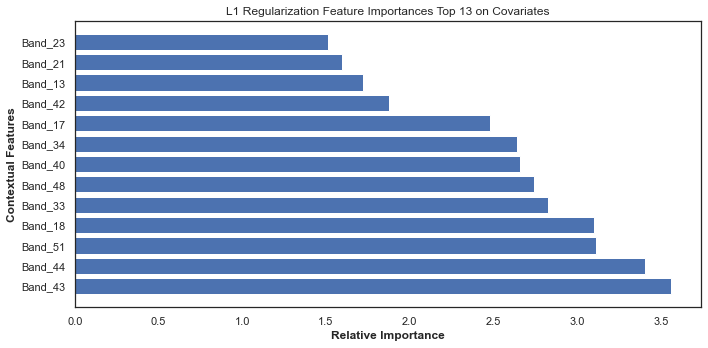

In [201]:
plt.figure(figsize=(10,5))
plt.title('L1 Regularization Feature Importances Top 13 on Covariates')
plt.barh(best_logistic['Contextual_features'][:13],best_logistic['values'][:13], color='b')
#plt.yticks(range(len(top_importances)), top_features)
plt.xlabel('Relative Importance')
plt.ylabel('Contextual Features')
plt.tight_layout()
plt.show()

# Random Forest Model

In [168]:
models = {'rfc': RandomForestClassifier( random_state=42)}
pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])
param_grids = {}
# Random Forest Hyper Parameters
# The grids for min_samples_split
min_samples_split_grids = [2,10, 20, 50, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1,10, 20, 50, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [169]:
# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []
# GridSearchCV
gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=1,
                      cv=StratifiedKFold(),
                      return_train_score=True)
        
# Fit the pipeline
gs = gs.fit(X_train_scaled, y_train)
    
# Update best_score_params_estimator_gs
best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])
    
# Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])
    
# Get the important columns in cv_results
important_columns = ['rank_test_score',
                         'mean_test_score', 
                         'std_test_score', 
                         'mean_train_score', 
                         'std_train_score',
                         'mean_fit_time', 
                         'std_fit_time',                        
                         'mean_score_time', 
                         'std_score_time']
    
# Move the important columns ahead
cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

# Write cv_results file
cv_results.to_csv(path_or_buf='result/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

best_score                                                     best_param  \
0 0.9633457362  {'model__min_samples_leaf': 1, 'model__min_samples_split': 2}   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [170]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [171]:
# Predict using test data
y_test_pred = best_estimator_gs.predict(X_test_scaled)

# Get the precision, recall, fscore, support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_test_pred)


# Get the dataframe of precision, recall, fscore and auc
pd.DataFrame([[precision, recall, fscore]], columns=['Precision', 'Recall', 'F1-score'])

Precision  \
0  [0.9951251218719532, 1.0, 0.9981657495414373]   

                                                         Recall  \
0  [0.9970693585151417, 0.8723404255319149, 0.9981657495414373]   

                                                      F1-score  
0  [0.996096291476903, 0.9318181818181819, 0.9981657495414373]

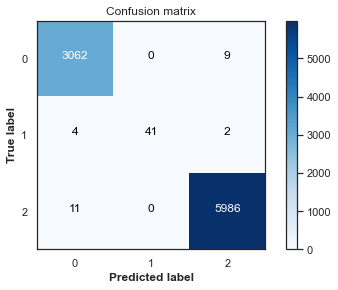

In [172]:
# Plotting confusion matrix obtained from the testing data predictions
sns.set(style="white")
cnf_matrix = confusion_matrix(y_test,y_test_pred)
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
class_names = ["0","1","2"]
plt.figure()
plot_confusion_matrix(cnf_matrix
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

In [173]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3071
           1       1.00      0.87      0.93        47
           2       1.00      1.00      1.00      5997

    accuracy                           1.00      9115
   macro avg       1.00      0.96      0.98      9115
weighted avg       1.00      1.00      1.00      9115



In [177]:
target="label"
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(X.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

#save results as csv
df_fi_rfc.to_csv('Covariate_best_random_forest_features.csv',index=False)

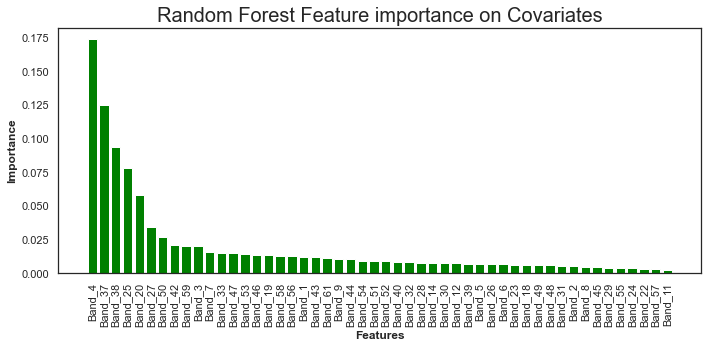

In [179]:
#Create a figure
fig = plt.figure(figsize=(10, 5))

# Implement me
# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:50], df_fi_rfc['Importance'][:50], color='green')

# Set x-axis
plt.title('Random Forest Feature importance on Covariates', fontsize=20)
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.show()
